# ECS 171 Project Group 21
## K-nearest neighbor algorithm 

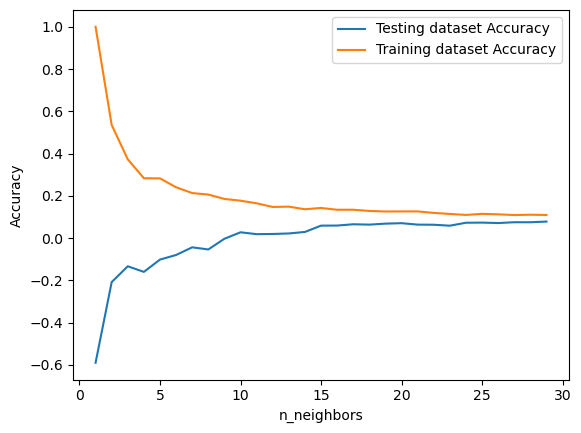

MSE: 0.9510286093582292
R2: 0.07106043514352256


In [1]:
# k near neighbors algorithm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# using post PCA dataset
mat = pd.read_csv('../datasets/student-por-PCA.csv')

#X = mat.drop(columns=['G3']) # using all features
X = mat[['activities_yes', 'activities_no', 'famsup_yes', 'famsup_no',
        'higher_yes', 'higher_no']] # using selected features only
y = mat['G3'] # target variable
  
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 

# calculates n_neighbors values from 1 to 20
neighbors = np.arange(1, 30) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
for i, k in enumerate(neighbors): 
    # compute training and testing accuracies for each n_neighbors value
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# create plot to show accuracies for each n_neighbors
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

# pick n_neighbors value with best accuracies

knn = KNeighborsRegressor(n_neighbors=26)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate the accuracy (for classifier, not regressor)
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy * 100:.2f}%')

# compute mean squared error and r squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

In [2]:
# pick n_neighbors value with best accuracies

knn = KNeighborsRegressor(n_neighbors=26)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate the accuracy (for classifier, not regressor)
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy * 100:.2f}%')

# compute mean squared error and r squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 0.9510286093582292
R2: 0.07106043514352256


When running the K-near neighbors algorithm, we compute the test and training accuracies at each iteration of n_neighbors. From there, we pick the iteration of n_neighbors with the highest accuracies. Ideally, the training and test accuracies should converge at the n_neighbors we chose in order to verify a good fit for the model. 

With the original unaltered data set, when running the model we would receive a MSE of about 7.8, indicating a fairly inaccurate model. 

After performing PCA on the data and reducing it to 20 attributes, we trained the model again. Since the dataset now has continous data instead of discrete data, we switched from a classifier model to a regressor. This model received an MSE of about 0.81, indicating a large decrease in the errors present in the original model.

From there, we chose the attributes with the highest correlations based on a heat map: famsup_yes/no, activities_yes/no, and higher_yes/no, with G3 as the target variable. The MSE improved to about 0.68, which while is still much improved and shows a fairly accurate model, it did not perform quite as well as the Random Forest model, which is why we chose it over the K-near neighbors model.